Informatik BMLD ZHAW, HS 2022

# Leistungsnachweis Pandas

## Aufgabenstellung
In diesem Leistungsnachweises sollen die bisher erworbenen Kenntnisse von Python, und insbesondere von Pandas, angewendet werden. Aufgabe ist es, entsprechend der vier Schritte der Datenanalyse eine eigene Datenanalyse anhand von selbst gewählten Daten zu erstellen. Folgende Anforderungen werden an die 4 Schritte gestellt:
1. Daten beschaffen und laden:
- Wählen eine Datenquelle und einen Datensatz (nicht das Beispiel Lebenserwartung aus der Vorlesung)
- Für ein «erfüllt» reicht ein Datensatz aus «Our World in Data»
- Zusatzpunkte gibt es, wenn weitere Argumente für den read-Befehl benutzt werden müssen.
2. Datenvorbereitung
- Hier sollen die Daten in das Long Format gebracht werden
- Sind die Daten bereits im Long Format, muss in diesem Schritt nichts gemacht werden
- Hier gibt es Zusatzpunkte, wenn die melt-Methode verwendet wird oder wenn mehrere Datensetzen vereint werden.
3. Daten-Exploration
- Mach eine statistische Analyse jeder Spalte (im Long Format)
4. Daten-Analyse. Wie beim Excel-Leistungsnachweise:
- Überlege eine für die Daten geeignete Forschungsfrage
- Beantwortet sie mit einer sinnvollen Visualisierung der Daten
- Beschreibe in wenigen Sätzen (als Richtlinie: max. 10) das Vorgehen und die Resultate der Visualisierung.
- Zusatzpunkte: Verwendung von Pivot, mehrere Visualisierungen, Recherche zur Plausibilisierung der Resultate.

## Rahmenbedingungen
- Ihr arbeitet in Gruppen von maximal 3 Personen.
- In der übungsstunde vom 1. Dezember könnt ihr Fragen stellen und bekommt Hilfe durch Adrian.
- Abgabezeitpunkt ist der 3. Dezember 2022 um 20h.
- Abzugeben ist eine Jupyter-Datei auf Moodle. Es reicht, wenn eine Person die Datei einreicht. Dateiname: Titel_Nachname1_Nachname2_Nachname3.ipynb
- Der Nachteilsausweis zählt 10% der Gesamtnote

Forschungsfrage:
## Ist Homeoffice eine effektive Art um den Energieverbrauch zu reduzieren?
### Abgrenzungen
- Nur Schweiz (Auch im Wissen, dass Bundesamt für Statistik nicht die beste Quelle ist)
- Um den Aufwand zu reduzieren wird nur der Individualverkehr betrachtet

### ToDo:
- Bessere Forschungsfrage? Ist reduzierte Mobilität...

### Grundsätzliches Vorgehen
1. Beschaffung von Daten die den Jahresverbrach an Energie zeigen (Treibstoffe, Elektrizität, Holz, etc.)
2. Beschaffung von Daten die Auskunft über die Mobilität geben (ÖV, Auto, etc.), am besten nach Alter
3. Korrelation finden:
- 2020 war das erste Corona-Jahr, in welchem die Mobilität durch Lockdowns stark eingeschränk war. Dadurch wurde auch auf alternative Arbeitsformen (Homeoffice) ausgewichen
- Der Treibstoffverbrauch müsste zurückgegangen sein
- Wie verhält sich der sonstige Energieverbrauch (Heizen, Strom)? Geht der auch zurück oder nimmt der Verbrauch zu?
4. Falls möglich Energieeinsparung berechen:
- Eingesparter Energieverbracuh auf die pendelnde Bevölkerung umrechen
5. Fazit

## 1 Daten beschaffen und laden
Verwendete Funktion: [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) 

In [2]:
import pandas as pandas

### 1.1 Endenergieverbrauch nach Energieträgern
Quelle: [Endenergieverbrauch nach Energieträgern](https://www.bfs.admin.ch/bfs/de/home/statistiken/energie/verbrauch.assetdetail.23104756.html)

Download als xlxs und speichern als Endenergieverbrauch nach `Endenergieverbrauch nach Energieträgern_raw.xlsx`. Die Daten müssen zwingend in Excel aufgearbeitet und bereinigt werden( abspeichern als CSV, einfügen eines einzeiligen Headers, entfernen aller unnötigen Leerzeichen, entfernen aller Tausenderzeichen) Die bereinigte Datei wird unter `Endenergieverbrauch nach Energieträgern_clean.csv` gespeichert, wobei nur das Arbeitsblatt 'in Terajoules' verwendet wird.

In [3]:
df_energy = pandas.read_csv('Endenergieverbrauch nach Energieträgern_clean.csv', engine='python', header=9, skipfooter=11, na_values='...')
df_energy

,Jahr,Total,Erdölbrennstoffe,Treibstoffe,Elektrizität,Gas,Kohle und Koks,Holz und Holzkohle,Fernwärme,Abfälle,Übrige erneuerbare Energien
0,1910,99990,240,500,3530,2220,76310,17190,NaN,NaN,NaN
1,1911,109490,340,620,4330,2350,84660,17190,NaN,NaN,NaN
2,1912,111190,350,660,5040,2570,85380,17190,NaN,NaN,NaN
3,1913,115670,340,690,5450,2550,89450,17190,NaN,NaN,NaN
4,1914,112640,150,520,5670,2570,86900,16830,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
107,2017,852260,127930,290100,210540,118910,4610,42720,19790.0,11220.0,26440.0
108,2018,833250,115630,294300,207530,112310,4290,40450,19360.0,11070.0,28310.0
109,2019,836230,112310,294360,205910,115210,3810,41080,21530.0,11670.0,30350.0
110,2020,747900,101110,226720,200570,112900,3660,39860,21050.0,11610.0,30420.0


### 1.1 Erwerbstätige Pendler nach Hauptverkehrsmitteln
Quelle: [Erwerbstätige Pendler/innen (Arbeitspendler/innen) nach Hauptverkehrsmitteln](https://www.bfs.admin.ch/bfs/de/home/aktuell/neue-veroeffentlichungen.assetdetail.20984171.html)

Download als xlxs und speichern als Endenergieverbrauch nach `Erwerbstätige Pendler nach Hauptverkehrsmitteln_raw.xlsx`. Die Daten müssen zwingend in Excel aufgearbeitet und bereinigt werden( abspeichern als CSV, einfügen eines einzeiligen Headers, entfernen aller unnötigen Leerzeichen, entfernen aller `Anteil in %` und `VI ±, in %`, entfernen aller Tausenderzeichen) Die bereinigte Datei wird unter `Erwerbstätige Pendler nach Hauptverkehrsmitteln_clean.csv` gespeichert.

In [29]:
df_transport = pandas.read_csv('Erwerbstätige Pendler nach Hauptverkehrsmitteln_clean.csv', engine='python', header=6, skipfooter=23, na_values='...')
df_transport

,Kategorie,1990,2000,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Total Pendler/innen1 mit bekanntem Hauptverkeh...,2925399.0,2998642.0,3599516.0,3640557.0,3651552.0,3843860.0,3901350.0,3921729.0,3925260.0,3976201.0,3574399.0,3603723.0,3452311
1,zu Fuss,307879.0,264954.0,358838.0,346896.0,337243.0,357585.0,357898.0,353955.0,345923.0,340003.0,321513.0,310575.0,331633
2,Velo,212781.0,203478.0,216031.0,232744.0,222485.0,248611.0,252703.0,258355.0,260601.0,271108.0,264245.0,287548.0,245989
3,elektrisches Velo (E-Bike),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52531
4,motorisierte Zweiräder (ohne E-Bike),117276.0,88950.0,65770.0,67008.0,63807.0,66471.0,70771.0,70775.0,63607.0,62778.0,56052.0,57915.0,54043
5,Auto,1467084.0,1661987.0,1884456.0,1918019.0,1929851.0,2026781.0,2046631.0,2056790.0,2058074.0,2074948.0,1841837.0,1833292.0,1811290
6,öffentlicher Strassenverkehr,493473.0,416192.0,495821.0,491274.0,500353.0,515745.0,528338.0,525677.0,534235.0,543681.0,487383.0,489619.0,422589
7,Bahn,326906.0,363081.0,570702.0,577183.0,590518.0,619213.0,636273.0,647728.0,654819.0,673410.0,593719.0,613841.0,519769
8,übrige Verkehrsmittel,0.0,0.0,7898.0,7433.0,7295.0,9453.0,8735.0,8449.0,8000.0,10273.0,9650.0,10933.0,14467
9,Pendler/innen1 mit unbekanntem Hauptverkehrsmi...,20023.0,59006.0,42539.0,26306.0,35003.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## 2 Datenvorbereitung
Die Daten stehen im `wide` Format zur verfügung und müssen mit `melt` ins `long` Format überführt werden.

Funktion [pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

Parameter setzten, damit:
- alle NaN Werte entfernt werden
- variable zu Kategorie wird
- value zu Wert (TJ) wird

In [50]:
# melt wide format to long
df_energy_long = df_energy.melt(id_vars=["Jahr"],var_name="Kategorie",value_name="Wert (TJ)").dropna()

# reduce dataframe to relevant categories and years (ds = dataset)
ds_energy_year = df_energy_long["Jahr"] >= 2017
ds_energy_fuel = df_energy_long["Kategorie"] == "Treibstoffe"
ds_energy_electricity = df_energy_long["Kategorie"] == "Elektrizität"

# apply datasets accordingly (and, or)
df_energy_reduced = df_energy_long[(ds_energy_year & (ds_energy_fuel | ds_energy_electricity))]
df_energy_reduced = df_energy_reduced.sort_values(by=["Jahr"])

df_fuel = df_energy_long[(ds_energy_year & ds_energy_fuel)]
df_electricity = df_energy_long[(ds_energy_year & ds_energy_electricity)]

df_energy_reduced

,Jahr,Kategorie,Wert (TJ)
331,2017,Treibstoffe,290100.0
443,2017,Elektrizität,210540.0
332,2018,Treibstoffe,294300.0
444,2018,Elektrizität,207530.0
333,2019,Treibstoffe,294360.0
445,2019,Elektrizität,205910.0
334,2020,Treibstoffe,226720.0
446,2020,Elektrizität,200570.0
335,2021,Treibstoffe,233210.0
447,2021,Elektrizität,209210.0


In [47]:
df_transport_long = df_transport.melt(id_vars=["Kategorie"],var_name="Jahr",value_name="Anzahl").dropna()
df_transport_long = df_transport_long[["Jahr", "Kategorie", "Anzahl"]] # reorder columns

# column "Jahr" seams to be a string: convert to number
df_transport_long[["Jahr"]] = df_transport_long[["Jahr"]].apply(pandas.to_numeric)
df_transport_long

# reduce dataframe to relevant categories and years (ds = dataset)
ds_transport_year = df_transport_long["Jahr"] >= 2017
ds_transport_car = df_transport_long["Kategorie"] == "Auto"
ds_transport_public = df_transport_long["Kategorie"] == "öffentlicher Strassenverkehr"

# apply datasets accordingly (and, or)
df_transport_reduced = df_transport_long[(ds_transport_year & (ds_transport_car | ds_transport_public))]
df_transport_reduced


,Jahr,Kategorie,Anzahl
95,2017,Auto,2074948.0
96,2017,öffentlicher Strassenverkehr,543681.0
105,2018,Auto,1841837.0
106,2018,öffentlicher Strassenverkehr,487383.0
115,2019,Auto,1833292.0
116,2019,öffentlicher Strassenverkehr,489619.0
125,2020,Auto,1811290.0
126,2020,öffentlicher Strassenverkehr,422589.0


## 3. Daten-Exploration
Graphische Darstellung der relevanten Kategorien.

***Frage: Das macht im long-Format wenig Sinn... Darf ins wide gewechselt werden?***

### 3.1 Treibstoffverbrauch letzte 5 Jahre
Im Corona Jahr 2020 gibt es einen starken Rückgang!

<AxesSubplot:xlabel='Jahr'>

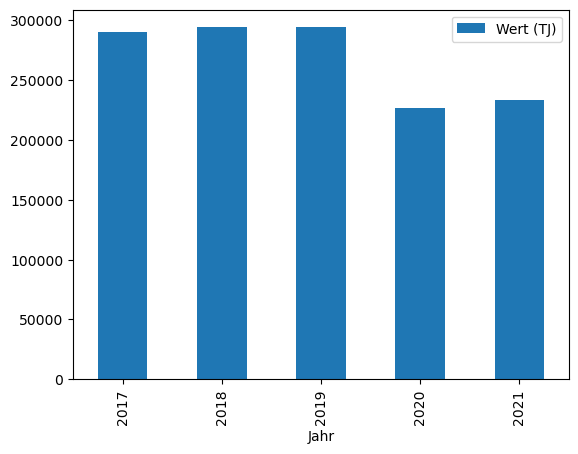

In [51]:
df_fuel.plot.bar(x="Jahr", y="Wert (TJ)")

### 3.1 Stromverbrauch letzte 5 Jahre
Der Stromverbrach ist annähernd konstant geblieben. Im Corona Jahr gibt es lediglich einen schwachen Rückgang.

<AxesSubplot:xlabel='Jahr'>

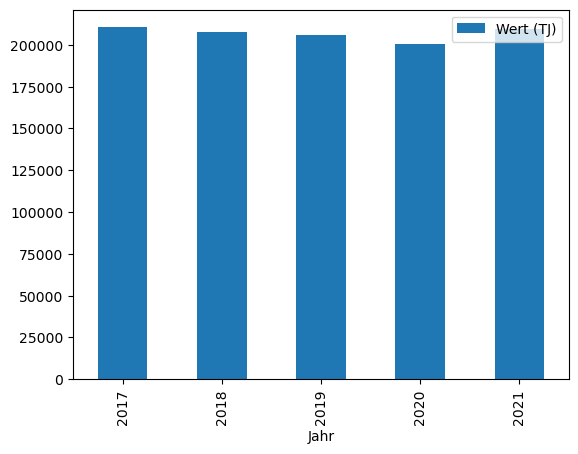

In [52]:
df_electricity.plot.bar(x="Jahr", y="Wert (TJ)")

### 4. Daten-Analyse
Berechnung der Diffenrenz im Verbrauch 2019/2020


In [65]:
# calculate difference in fuel usage between 2019 and 2020
value_2019 = df_fuel.loc[333, "Wert (TJ)"]
value_2020 = df_fuel.loc[334, "Wert (TJ)"]
difference = value_2019 - value_2020

print("Verbrauch von Treibstoff im Jahr 2019: ", value_2019, "TJ")
print("Verbrauch von Treibstoff im Jahr 2020: ", value_2020, "TJ")
print("Differenz im Verbrauch: ", difference , "TJ")

Verbrauch von Treibstoff im Jahr 2019:  294360.0 TJ
Verbrauch von Treibstoff im Jahr 2020:  226720.0 TJ
Differenz im Verbrauch:  67640.0 TJ


Berechnung der Anzahl Personen die mit Treibstoffverbrauchenden Verkehrsmittel pendeln (Jahr 2020)

In [67]:
# calculate difference in fuel usage between 2019 and 2020
car = df_transport_reduced.loc[125, "Anzahl"]
public_transport = df_transport_reduced.loc[126, "Anzahl"]
total = car + public_transport

print("Anzahl Pendler im Auto: ", car)
print("Anzahl Pendler im ÖV: ", public_transport)
print("Total: ", total)

Anzahl Pendler im Auto:  1811290.0
Anzahl Pendler im ÖV:  422589.0
Total:  2233879.0


In [76]:
consumption_per_pers = difference / total * 1000
print("Gesparter Verbrauch: ", consumption_per_pers, "GJ/Jahr", "-->", consumption_per_pers, "GWs/Jahr")

consumption_W = (consumption_per_pers * 10**9) / (3.154 * 10**7)
print("Gesparter Verbrauch in Watt: ", consumption_W, "W")

Verbrauch:  30.27916910450387 GJ/Jahr --> 30.27916910450387 GWs/Jahr
Verbrauch in Watt:  960.0243850508518 W
